In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('data/raw-complaints.csv', low_memory=False)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479257 entries, 0 to 3479256
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 3479257 non-null  object
 1   Product                       3479257 non-null  object
 2   Sub-product                   3243966 non-null  object
 3   Issue                         3479257 non-null  object
 4   Sub-issue                     2778694 non-null  object
 5   Consumer complaint narrative  1254126 non-null  object
 6   Company public response       1546081 non-null  object
 7   Company                       3479257 non-null  object
 8   State                         3438123 non-null  object
 9   ZIP code                      3437600 non-null  object
 10  Tags                          383746 non-null   object
 11  Consumer consent provided?    2605489 non-null  object
 12  Submitted via                 3479257 non-

In [7]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        700563
Consumer complaint narrative    2225131
Company public response         1933176
Company                               0
State                             41134
ZIP code                          41657
Tags                            3095511
Consumer consent provided?       873768
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2710864
Complaint ID                          0
dtype: int64

In [8]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2021-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,hi experian has a low and unfair credit number...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60615,Servicemember,Consent provided,Web,2021-10-12,Closed with non-monetary relief,Yes,NaN,4799925
1,2021-01-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I disputed innacurate accounts reported by you...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60615,NaN,Consent provided,Web,2021-01-12,Closed with explanation,Yes,NaN,4061709
2,2023-01-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I have continued to dispute this account with ...,NaN,"EQUIFAX, INC.",FL,33823,NaN,Consent provided,Web,2023-01-24,Closed with explanation,Yes,NaN,6482822
3,2022-06-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,NaN,"EQUIFAX, INC.",IL,60106,NaN,Consent provided,Web,2022-06-21,Closed with explanation,Yes,NaN,5693484
4,2023-01-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,NaN,"EQUIFAX, INC.",IL,60619,NaN,Consent provided,Web,2023-01-23,Closed with explanation,Yes,NaN,6477844


In [9]:
columns= df.columns.str.lower()
columns= columns.str.replace(' ', '_')
columns= columns.str.replace('-', '_')
columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [10]:
df.columns=columns
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [21]:
df['date_received']= df['date_received'].astype('datetime64[ns]')
df['year']= df['date_received'].dt.year
df['month_year']= df['date_received'].dt.to_period('M')
df.year.value_counts().sort_index()

2011      2536
2012     72372
2013    108215
2014    153029
2015    168459
2016    191441
2017    242888
2018    257234
2019    277311
2020    444314
2021    496005
2022    800427
2023    265026
Name: year, dtype: int64

In [25]:
transaction_counts= df.year.value_counts().sort_index()[1:-1]
transaction_counts

2012     72372
2013    108215
2014    153029
2015    168459
2016    191441
2017    242888
2018    257234
2019    277311
2020    444314
2021    496005
2022    800427
Name: year, dtype: int64

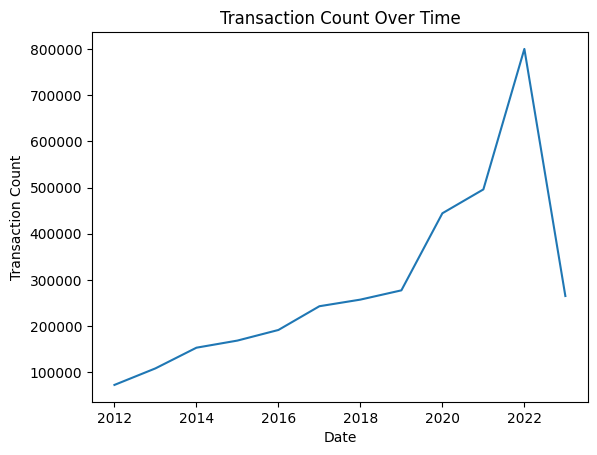

In [24]:
# plot the transaction counts over time
plt.plot(transaction_counts.index, transaction_counts.values)
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Over Time')
plt.show()

In [17]:
df.groupby('year')['timely_response?'].value_counts()

year  timely_response?
2011  Yes                   2285
      No                     251
2012  Yes                  69865
      No                    2507
2013  Yes                 106948
      No                    1267
2014  Yes                 149410
      No                    3619
2015  Yes                 163651
      No                    4808
2016  Yes                 184796
      No                    6645
2017  Yes                 235953
      No                    6935
2018  Yes                 252728
      No                    4506
2019  Yes                 273089
      No                    4222
2020  Yes                 439656
      No                    4658
2021  Yes                 489769
      No                    6236
2022  Yes                 795122
      No                    5305
2023  Yes                 263935
      No                    1091
Name: timely_response?, dtype: int64

In [18]:
df.groupby('year')['consumer_disputed?'].value_counts()

year  consumer_disputed?
2011  No                      1963
      Yes                      573
2012  No                     55945
      Yes                    16427
2013  No                     85621
      Yes                    22594
2014  No                    123318
      Yes                    29711
2015  No                    134176
      Yes                    34283
2016  No                    156653
      Yes                    34788
2017  No                     62339
      Yes                    10002
Name: consumer_disputed?, dtype: int64

In [4]:
72372/265026

0.27307509451902834

In [20]:
df['date_received'].min()

Timestamp('2011-12-01 00:00:00')

(array([  74908.,  108215.,  153029.,  168459.,  191441.,  500122.,
         277311.,  444314.,  496005., 1065453.]),
 array([2011. , 2012.2, 2013.4, 2014.6, 2015.8, 2017. , 2018.2, 2019.4,
        2020.6, 2021.8, 2023. ]),
 <BarContainer object of 10 artists>)

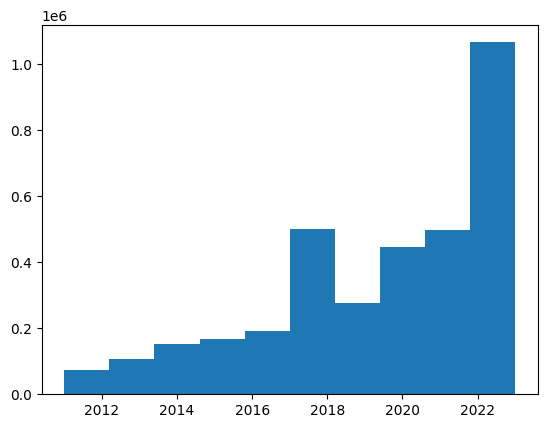

In [12]:
plt.hist(df['year'])

In [13]:
# reason- consumer disputes are not reported from 2017. There is issues in the data collection in first two years
df= df[df['year'].isin([2013, 2014, 2015, 2016])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621144 entries, 19835 to 3479255
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 621144 non-null  datetime64[ns]
 1   product                       621144 non-null  object        
 2   sub_product                   428681 non-null  object        
 3   issue                         621144 non-null  object        
 4   sub_issue                     269314 non-null  object        
 5   consumer_complaint_narrative  132561 non-null  object        
 6   company_public_response       161459 non-null  object        
 7   company                       621144 non-null  object        
 8   state                         616619 non-null  object        
 9   zip_code                      616623 non-null  object        
 10  tags                          91168 non-null   object        
 11  consumer

In [24]:
df.isna().sum()

date_received                        0
product                              0
sub_product                     192463
issue                                0
sub_issue                       351830
consumer_complaint_narrative    488583
company_public_response         459685
company                              0
state                             4525
zip_code                          4521
tags                            529976
consumer_consent_provided?      380850
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response?                     0
consumer_disputed?                   0
complaint_id                         0
year                                 0
month_year                           0
dtype: int64

In [27]:
import missingno as msno

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [28]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
tags,3095511,89.0
consumer_disputed?,2710864,77.9
consumer_complaint_narrative,2225131,64.0
company_public_response,1933176,55.6
consumer_consent_provided?,873768,25.1
sub_issue,700563,20.1
sub_product,235291,6.8
zip_code,41657,1.2
state,41134,1.2
company_response_to_consumer,4,0.0


In [27]:
df['tags'].value_counts()

Older American                   51667
Servicemember                    31713
Older American, Servicemember     7788
Name: tags, dtype: int64

In [28]:
df.drop(columns=['tags', 'consumer_complaint_narrative', 'company_public_response'], inplace=True)
df.shape

(621144, 17)

In [29]:
df['product']= df['product'].astype('category')
df['product'].value_counts()

Mortgage                   176170
Debt collection            130359
Credit reporting           121971
Bank account or service     67038
Credit card                 65444
Consumer Loan               26046
Student loan                19876
Payday loan                  5048
Money transfers              4914
Prepaid card                 3370
Other financial service       893
Virtual currency               15
Name: product, dtype: int64

In [30]:
df['sub_product']= df['sub_product'].astype('category')
df['sub_product'].value_counts()

Other mortgage                            63559
Conventional fixed mortgage               56570
Checking account                          45329
Other (i.e. phone, health club, etc.)     39226
I do not know                             27132
Credit card                               26073
FHA mortgage                              20228
Conventional adjustable mortgage (ARM)    20171
Non-federal student loan                  18430
Medical                                   18302
Other bank product/service                14764
Vehicle loan                              14635
Home equity loan or line of credit         9301
Installment loan                           7315
Payday loan                                6981
Mortgage                                   4474
VA mortgage                                4235
Federal student loan servicing             4071
Savings account                            4043
Auto                                       3312
International money transfer            

In [17]:
df['issue'].value_counts()

Incorrect information on credit report      89120
Loan modification,collection,foreclosure    85497
Loan servicing, payments, escrow account    62320
Cont'd attempts collect debt not owed       54262
Account opening, closing, or management     29745
                                            ...  
Lost or stolen money order                     36
Incorrect exchange rate                        22
Lender sold the property                        7
Lender damaged or destroyed vehicle             6
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [18]:
df['issue']= df['issue'].astype('category')

In [19]:
df['sub_issue'].value_counts()

Debt is not mine                            33044
Account status                              33034
Information is not mine                     27722
Not given enough info to verify debt        18407
Debt was paid                               14827
Frequent or repeated calls                  13515
Account terms                                9556
Attempted to collect wrong amount            7966
Public record                                7547
Personal information                         6502
Right to dispute notice not received         6272
Problem getting my free annual report        5927
No notice of investigation status/result     5441
Problem with statement of dispute            5077
Reinserted previously deleted info           4759
Report improperly shared by CRC              4537
Talked to a third party about my debt        4511
Threatened to take legal action              4338
Debt resulted from identity theft            4195
Problem getting report or credit score       3919


In [20]:
df['sub_issue']= df['sub_issue'].astype('category')

In [31]:
df.isna().sum()

date_received                        0
product                              0
sub_product                     192463
issue                                0
sub_issue                       351830
company                              0
state                             4525
zip_code                          4521
consumer_consent_provided?      380850
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response?                     0
consumer_disputed?                   0
complaint_id                         0
year                                 0
month_year                           0
dtype: int64

In [32]:
df['company'].value_counts()

BANK OF AMERICA, NATIONAL ASSOCIATION         46363
EQUIFAX, INC.                                 42715
WELLS FARGO & COMPANY                         40776
Experian Information Solutions Inc.           40296
TRANSUNION INTERMEDIATE HOLDINGS, INC.        34753
                                              ...  
Ernst, Ernst & Artmann, Inc.                      1
Kirschbaum, Nanney, Keenan & Griffin, P.A.        1
Oregon Credit & Collections Bureau, Inc.          1
i3 Lending, Inc                                   1
Emergi-Cash                                       1
Name: company, Length: 4009, dtype: int64

In [35]:
a= pd.DataFrame(df['company'].value_counts())
a.reset_index(inplace=True)
a.columns=['company', 'count_complaints']
a

,company,count_complaints
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",46363
1,"EQUIFAX, INC.",42715
2,WELLS FARGO & COMPANY,40776
3,Experian Information Solutions Inc.,40296
4,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",34753
...,...,...
4004,"Ernst, Ernst & Artmann, Inc.",1
4005,"Kirschbaum, Nanney, Keenan & Griffin, P.A.",1
4006,"Oregon Credit & Collections Bureau, Inc.",1
4007,"i3 Lending, Inc",1


In [40]:
a['count_complaints'].describe(
    percentiles=[0.80, 0.85, 0.90, 0.95, 0.97, 0.99])

count     4009.000000
mean       154.937391
std       1717.806467
min          1.000000
50%          6.000000
80%         35.000000
85%         51.000000
90%         90.400000
95%        226.200000
97%        472.760000
99%       1888.040000
max      46363.000000
Name: count_complaints, dtype: float64

In [44]:
df[df['company'].isin(a[a['count_complaints']>=90]['company'])].shape

(576505, 17)

In [45]:
df.shape

(621144, 17)

In [30]:
(621144-576505)/621144

0.0718657831356336

In [47]:
df= df[df['company'].isin(a[a['count_complaints']>=90]['company'])]
df.reset_index(inplace=True, drop=True)
df['company'].value_counts()

BANK OF AMERICA, NATIONAL ASSOCIATION     46363
EQUIFAX, INC.                             42715
WELLS FARGO & COMPANY                     40776
Experian Information Solutions Inc.       40296
TRANSUNION INTERMEDIATE HOLDINGS, INC.    34753
                                          ...  
FIRST AMERICAN FINANCIAL CORPORATION         90
VIRTUOSO SOURCING GROUP, LLC.                90
CARDINAL FINANCIAL COMPANY                   90
BANCORPSOUTH BANK                            90
RS Clark and Associates, Inc.                90
Name: company, Length: 406, dtype: int64

<BarContainer object of 406 artists>

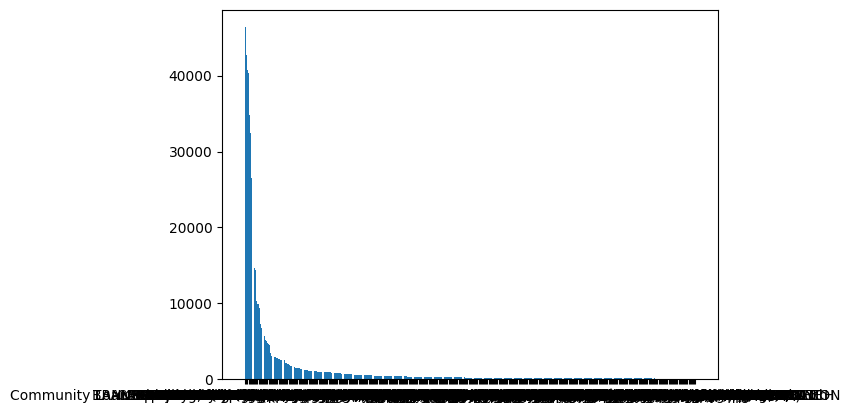

In [48]:
a= pd.DataFrame(df['company'].value_counts())
a= a.reset_index()
plt.bar(a['index'], a['company'])

(array([[406.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [384.,   8.,   4.,   2.,   1.,   1.,   1.,   1.,   2.,   2.]]),
 array([0.0, 4636.3, 9272.6, 13908.900000000001, 18545.2, 23181.5,
        27817.800000000003, 32454.100000000002, 37090.4,
        41726.700000000004, 46363.0], dtype=object),
 <a list of 2 BarContainer objects>)

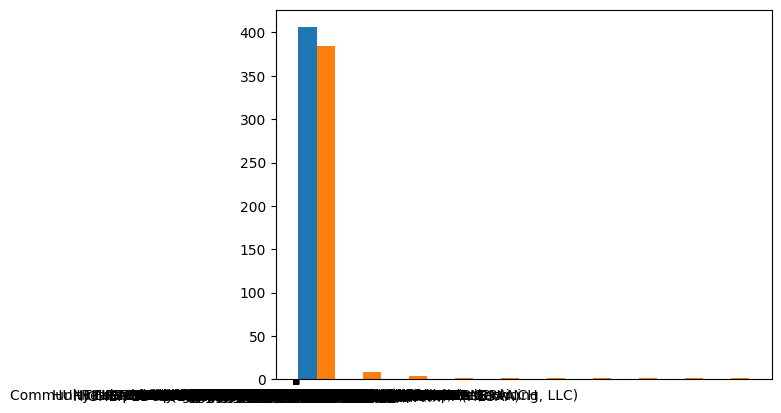

In [49]:
plt.hist(a)

In [50]:
a.columns=['company', 'occurances']
a['occurances'].describe()

count      406.000000
mean      1419.963054
std       5235.921391
min         90.000000
25%        132.250000
50%        225.000000
75%        606.750000
max      46363.000000
Name: occurances, dtype: float64

In [51]:
a['occurances'].value_counts()

225    6
107    6
98     5
162    5
171    5
      ..
637    1
622    1
608    1
603    1
361    1
Name: occurances, Length: 282, dtype: int64

In [52]:
df

,date_received,product,sub_product,issue,sub_issue,company,state,zip_code,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id,year,month_year
0,2015-10-26,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,Hillcrest Davidson & Associates,MO,64034,Consent provided,Web,2015-10-28,Closed,Yes,Yes,1623836,2015,2015-10
1,2016-07-08,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,HSBC NORTH AMERICA HOLDINGS INC.,NY,11358,Consent not provided,Web,2016-07-08,Closed with explanation,Yes,No,2004883,2016,2016-07
2,2014-09-22,Credit card,NaN,Other,NaN,CAPITAL ONE FINANCIAL CORPORATION,NH,03811,NaN,Web,2014-09-22,Closed with explanation,Yes,No,1038897,2014,2014-09
3,2013-03-13,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,"HUNTINGTON NATIONAL BANK, THE",OH,44070,NaN,Web,2013-03-18,Closed with explanation,Yes,Yes,353552,2013,2013-03
4,2013-05-13,Credit card,NaN,Late fee,NaN,AMERICAN EXPRESS COMPANY,NY,10958,NaN,Web,2013-05-13,Closed with monetary relief,Yes,No,405371,2013,2013-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576500,2014-03-03,Credit card,NaN,Payoff process,NaN,U.S. BANCORP,CA,92392,NaN,Web,2014-03-03,Closed with non-monetary relief,Yes,No,740648,2014,2014-03
576501,2014-01-07,Credit reporting,NaN,Incorrect information on credit report,Account status,Experian Information Solutions Inc.,TX,78729,NaN,Postal mail,2014-01-27,Closed with explanation,Yes,No,657754,2014,2014-01
576502,2016-04-19,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,"EQUIFAX, INC.",CA,92036,Other,Web,2016-04-19,Closed with explanation,Yes,No,1887015,2016,2016-04
576503,2016-07-19,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,PNC Bank N.A.,TX,75022,Consent provided,Web,2016-07-19,Closed,Yes,No,2018364,2016,2016-07


In [54]:
print(len(df['product'].unique()))
print(len(df['sub_product'].unique()))
print(len(df['issue'].unique()))
print(len(df['sub_issue'].unique()))

print(len(df['company'].unique()))

11
48
95
59
406


# do label encoding for the product, sub-product, issue, and sub-issue
# do count encoding for company

In [55]:
df.isna().sum()

date_received                        0
product                              0
sub_product                     190379
issue                                0
sub_issue                       339429
company                              0
state                             4262
zip_code                          4255
consumer_consent_provided?      358790
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response?                     0
consumer_disputed?                   0
complaint_id                         0
year                                 0
month_year                           0
dtype: int64

In [56]:
df.shape

(576505, 17)

In [57]:
df.dropna(subset=['zip_code', 'state'], inplace=True)
df['state'].value_counts()

CA    83118
FL    56457
TX    45324
NY    40315
GA    26565
      ...  
MH       23
MP       21
AS       15
AA       12
PW       10
Name: state, Length: 62, dtype: int64

In [60]:
df['state'].unique()

array(['MO', 'NY', 'NH', 'OH', 'TX', 'CA', 'KY', 'HI', 'NC', 'WA', 'VA',
       'IL', 'FL', 'GA', 'WI', 'PR', 'TN', 'MD', 'AE', 'OK', 'MI', 'MA',
       'UT', 'NJ', 'PA', 'CO', 'MT', 'SC', 'KS', 'MN', 'IA', 'CT', 'AZ',
       'SD', 'AL', 'WV', 'OR', 'IN', 'DE', 'ID', 'AR', 'ME', 'NV', 'MS',
       'LA', 'NM', 'NE', 'DC', 'VT', 'AK', 'RI', 'AP', 'ND', 'WY', 'VI',
       'GU', 'FM', 'MH', 'AS', 'MP', 'AA', 'PW'], dtype=object)

In [58]:
us_state_codes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 
                  'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 
                  'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 
                  'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
                  'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 
                  'VA', 'WA', 'WV', 'WI', 'WY']
df[df['state'].isin(us_state_codes)]['state'].value_counts()

CA    83118
FL    56457
TX    45324
NY    40315
GA    26565
NJ    23369
PA    21152
IL    21026
VA    18791
MD    18168
OH    17439
NC    16467
MI    14030
AZ    12571
WA    11691
MA    10997
CO     9825
TN     8806
SC     7447
MO     7404
NV     7163
OR     6819
CT     6642
MN     6536
IN     6276
AL     6049
WI     6010
LA     5828
KY     4103
OK     3687
UT     3005
DE     2910
NM     2895
KS     2657
MS     2640
NH     2495
AR     2489
IA     2405
ID     1886
HI     1866
RI     1831
ME     1824
NE     1676
WV     1479
VT      896
MT      858
SD      710
AK      670
WY      539
ND      496
Name: state, dtype: int64

In [59]:
len(df[df['state'].isin(us_state_codes)]['state'].unique())

50

In [61]:
df.shape

(572235, 17)

In [62]:
df= df[df['state'].isin(us_state_codes)]
df.shape

(566302, 17)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566302 entries, 0 to 576504
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 566302 non-null  datetime64[ns]
 1   product                       566302 non-null  category      
 2   sub_product                   379019 non-null  category      
 3   issue                         566302 non-null  category      
 4   sub_issue                     233496 non-null  category      
 5   company                       566302 non-null  object        
 6   state                         566302 non-null  object        
 7   zip_code                      566302 non-null  object        
 8   consumer_consent_provided?    214772 non-null  object        
 9   submitted_via                 566302 non-null  object        
 10  date_sent_to_company          566302 non-null  object        
 11  company_respo

In [65]:
df['company']= df['company'].astype('category')
df['state']= df['state'].astype('category')
df.info()

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_37428\2501622004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company']= df['company'].astype('category')
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_37428\2501622004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state']= df['state'].astype('category')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 566302 entries, 0 to 576504
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 566302 non-null  datetime64[ns]
 1   product                       566302 non-null  category      
 2   sub_product                   379019 non-null  category      
 3   issue                         566302 non-null  category      
 4   sub_issue                     233496 non-null  category      
 5   company                       566302 non-null  category      
 6   state                         566302 non-null  category      
 7   zip_code                      566302 non-null  object        
 8   consumer_consent_provided?    214772 non-null  object        
 9   submitted_via                 566302 non-null  object        
 10  date_sent_to_company          566302 non-null  object        
 11  company_respo

In [66]:
df['consumer_consent_provided?'].value_counts()

Consent provided        117603
Consent not provided     90369
Other                     6796
Consent withdrawn            4
Name: consumer_consent_provided?, dtype: int64

In [68]:
df['submitted_via'].value_counts()

Web            389986
Referral        92009
Postal mail     37939
Phone           37875
Fax              8345
Email             148
Name: submitted_via, dtype: int64

In [69]:
df['company_response_to_consumer'].value_counts()

Closed with explanation            440717
Closed with non-monetary relief     75896
Closed with monetary relief         38317
Closed                              10944
Untimely response                     428
Name: company_response_to_consumer, dtype: int64

In [70]:
df['timely_response?'].value_counts()

Yes    557930
No       8372
Name: timely_response?, dtype: int64

In [71]:
df['company_response_to_consumer'].unique()

array(['Closed', 'Closed with explanation', 'Closed with monetary relief',
       'Closed with non-monetary relief', 'Untimely response'],
      dtype=object)

In [72]:
df.shape

(566302, 17)

In [74]:
df[~df['company_response_to_consumer'].isin(['Untimely response'])].shape

(565874, 17)

In [75]:
df= df[~df['company_response_to_consumer'].isin(['Untimely response'])]
df.reset_index(inplace=True, drop=True)
df.shape

(565874, 17)

In [76]:
df['timely_response?'].value_counts()

Yes    557930
No       7944
Name: timely_response?, dtype: int64

In [77]:
df['consumer_disputed?'].value_counts()

No     454942
Yes    110932
Name: consumer_disputed?, dtype: int64

In [78]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'company', 'state', 'zip_code', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id', 'year',
       'month_year'],
      dtype='object')

In [79]:
df.columns=['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'company', 'state', 'zip_code', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id', 'year',
       'month_year']

df= df[['complaint_id', 'submitted_via', 'date_received', 'date_sent_to_company', 'timely_response', 'year', 
        'product', 'sub_product', 'issue', 'sub_issue', 'company', 'state', 
        'consumer_consent_provided', 'company_response_to_consumer', 'consumer_disputed']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   complaint_id                  565874 non-null  int64         
 1   submitted_via                 565874 non-null  object        
 2   date_received                 565874 non-null  datetime64[ns]
 3   date_sent_to_company          565874 non-null  object        
 4   timely_response               565874 non-null  object        
 5   year                          565874 non-null  int64         
 6   product                       565874 non-null  category      
 7   sub_product                   378745 non-null  category      
 8   issue                         565874 non-null  category      
 9   sub_issue                     233262 non-null  category      
 10  company                       565874 non-null  category      
 11  state        

In [80]:
df['submitted_via']= df['submitted_via'].astype('category')
df['timely_response']= df['timely_response'].astype('category')
df['consumer_consent_provided']= df['consumer_consent_provided'].astype('category')
df['company_response_to_consumer']= df['company_response_to_consumer'].astype('category')
df['consumer_disputed']= df['consumer_disputed'].astype('category')
df['date_sent_to_company']= df['date_sent_to_company'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   complaint_id                  565874 non-null  int64         
 1   submitted_via                 565874 non-null  category      
 2   date_received                 565874 non-null  datetime64[ns]
 3   date_sent_to_company          565874 non-null  datetime64[ns]
 4   timely_response               565874 non-null  category      
 5   year                          565874 non-null  int64         
 6   product                       565874 non-null  category      
 7   sub_product                   378745 non-null  category      
 8   issue                         565874 non-null  category      
 9   sub_issue                     233262 non-null  category      
 10  company                       565874 non-null  category      
 11  state        

In [81]:
df.to_csv('data/cleaned-complaints.csv', index=False)